In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as CS
import os,datetime,sys,fnmatch
from mpl_toolkits import basemap
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from pyhdf.SD import SD, SDC
import os
import seaborn as sns
from matplotlib.patches import Rectangle

In [2]:
# simple plotting function
def plot_2D_global(lons,lats,data_2D,
                   data_name=None,
                   levels=20,
                   plot_type='normal',
                   vmin=0, vmax=0,
                   cmap='rainbow',
                   label=''
                   ):
    
    mapproj = Basemap(projection='cyl',
                llcrnrlat=-90, #lats.min(),
                llcrnrlon=lons.min(),
                urcrnrlat= 90, #lats.max(),
                urcrnrlon= lons.max())
    
    lonall, latall = mapproj.makegrid(lons.size, lats.size)
    lonproj, latproj = mapproj(lonall, latall)
    
    latlines = np.arange(latall.min(),latall.max()+1,15)
    lonlines = np.arange(lonall.min(),lonall.max()+1,45)
    
    if plot_type =='normal':
        ctr = mapproj.contourf(lonproj, latproj,data_2D,
                           vmin = vmin,
                           vmax = vmax,
                           levels = levels,
                           cmap   = cmap)
        
    elif plot_type == 'difference':
        ctr = mapproj.contourf(lonproj, latproj,data_2D,
                           vmin = vmin,
                           vmax = vmax,
                           levels = levels,
                           cmap   = cmap,
                           cbar_kwargs={"ticks": levels})
        plt.clim(vmin,vmax)
        
    
    
    plt.title(data_name)
    
    mapproj.drawcoastlines()
    mapproj.drawparallels(latlines, labels=[1,0,0,0])
    mapproj.drawmeridians(lonlines, labels=[0,0,0,1])
    
    mapproj.colorbar(ctr,"bottom", size="5%",pad = '20%', label=label)
    
    figname = data_name+'.png'
            
    #plt.savefig('Results/'+figname,dpi=200)
    
    #plt.show()

In [3]:
# read CESM and CERES data

def read_data_monthly(data_type,var_name):
    data_dir = '/umbc/xfs1/zzbatmos/users/dwick1/CyberTraining/HW6/cesm2_1_0_compset_FHIST_res_f09_f09_mg17/archive/cesm2_1_0_compset_FHIST_res_f09_f09_mg17/atm/hist/'
    data_array = []
    # CESM
    
    if data_type == 'cesm':
        prefix = 'cesm2_1_0_compset_FHIST_res_f09_f09_mg17.cam.h0'
        suffix = '.2008-01.nc'
        ncfile   =  data_dir + prefix + suffix
        
        # define the class for reading 2D (lat-lon) cesm data
        class cesm_data_2D(object):
            def __init__(self,fn,var):   
                dataset = Dataset(fn)
                self.name = var
                self.lons = dataset.variables['lon'][:]
                self.lats = dataset.variables['lat'][:]
                self.time = dataset.variables['time'][:]
                self.date = dataset.variables['date'][:]
                self.data = dataset.variables[var][:,:,:]
                
        
        data = cesm_data_2D(ncfile,var_name)
        print (np.shape(data.data))
        
    return data

In [4]:
CLDTOT_data = read_data_monthly(data_type='cesm',var_name='CLDTOT') # Total Cloud Fraction
CLDTOT_mean = CLDTOT_data.data.mean(axis=0)

CLTMODIS_data = read_data_monthly(data_type='cesm',var_name='CLTMODIS') # MODIS total cloud fraction
CLTMODIS_mean = np.nanmean(CLTMODIS_data.data, axis=0)

CLDTOT_CAL_data = read_data_monthly(data_type='cesm',var_name='CLDTOT_CAL') # Lidar Total Cloud Fraction
CLDTOT_CAL_mean = CLDTOT_CAL_data.data.mean(axis=0)

FLNT_data = read_data_monthly(data_type='cesm',var_name='FLNT') # Net longwave flux at top of model
FLNT_mean = FLNT_data.data.mean(axis=0)

FSNT_data = read_data_monthly(data_type='cesm',var_name='FSNT') # Net solar flux at top of mode
FSNT_mean = FSNT_data.data.mean(axis=0)

(1, 192, 288)
(1, 192, 288)
(1, 192, 288)
(1, 192, 288)
(1, 192, 288)


/umbc/xfs1/zzbatmos/users/dwick1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


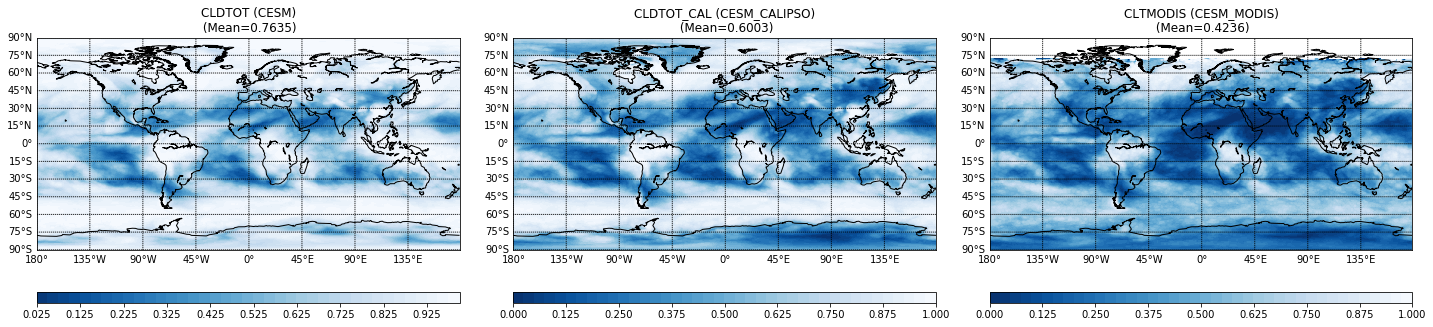

In [5]:
plt.figure(figsize=(20,20))
#CESM
plt.subplot(131)
plot_2D_global(CLDTOT_data.lons+180,CLDTOT_data.lats,np.roll(CLDTOT_mean,144,axis=1), data_name = 'CLDTOT (CESM)\n (Mean=%.4g)' %np.mean(np.roll(CLDTOT_mean,144,axis=1)), levels=40, plot_type='normal', vmin=0, vmax=1, cmap='Blues_r')
#CESM_CALIPSO
plt.subplot(132)
plot_2D_global(CLDTOT_CAL_data.lons+180,CLDTOT_CAL_data.lats,np.roll(CLDTOT_CAL_mean/100,144,axis=1), data_name = 'CLDTOT_CAL (CESM_CALIPSO)\n (Mean=%.4g)' %np.mean(np.roll(CLDTOT_CAL_mean/100,144,axis=1)), levels=40, plot_type='normal', vmin=0, vmax=1, cmap='Blues_r')
#CESM_MODIS
plt.subplot(133)
plot_2D_global(CLTMODIS_data.lons+180,CLTMODIS_data.lats,np.roll(CLTMODIS_mean/100,144,axis=1), data_name = 'CLTMODIS (CESM_MODIS)\n (Mean=%.4g)' %np.mean(np.roll(CLTMODIS_mean/100,144,axis=1)), levels=40, plot_type='normal', vmin=0, vmax=1, cmap='Blues_r')
plt.tight_layout()
plt.savefig('/umbc/xfs1/cybertrn/cybertraining2020/team3/instruction/module06/cesm_run/CESM_2008_Jan.eps',format='eps')
plt.show()

/umbc/xfs1/zzbatmos/users/dwick1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


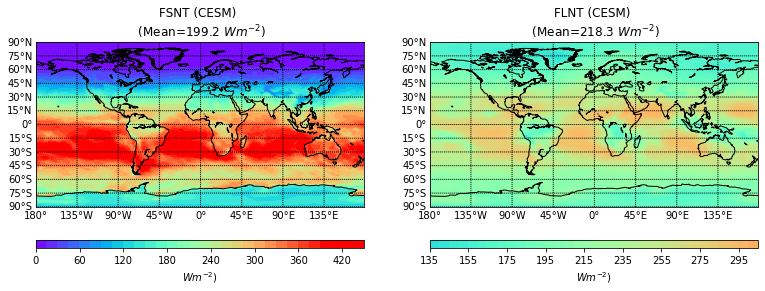

In [6]:
plt.figure(figsize=(20,20))
#CESM_FSNT
plt.subplot(131)
plot_2D_global(FSNT_data.lons+180,FSNT_data.lats,np.roll(FSNT_mean,144,axis=1), data_name = 'FSNT (CESM) \n (Mean=%.4g $Wm^{-2}$)' %np.mean(np.roll(FSNT_mean,144,axis=1)), levels=40, plot_type='normal', vmin=0, vmax=400, cmap='rainbow', label='$Wm^{-2}$)')
#CESM_FLNT
plt.subplot(132)
plot_2D_global(FLNT_data.lons+180,FLNT_data.lats,np.roll(FLNT_mean,144,axis=1), data_name = 'FLNT (CESM) \n (Mean=%.4g $Wm^{-2}$)' %np.mean(np.roll(FLNT_mean,144,axis=1)), levels=40, plot_type='normal', vmin=0, vmax=400, cmap='rainbow', label='$Wm^{-2}$)')
plt.savefig('/umbc/xfs1/cybertrn/cybertraining2020/team3/instruction/module06/cesm_run/CESM_radiation_2008_Jan.eps',format='eps')
plt.show()

(180, 360)
(180, 360)


/umbc/xfs1/zzbatmos/users/dwick1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/umbc/xfs1/zzbatmos/users/dwick1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'


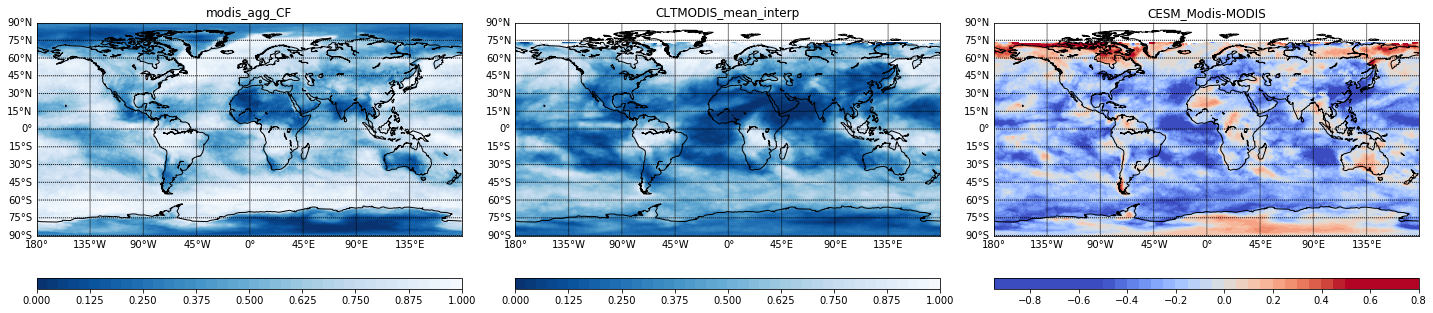

In [7]:
#Modis obs and model output difference for 2008-01

#modis aggregated cloud fraction
lons = range(0,360)
lons = np.array(lons)
lats = range(-90,90)
lats = np.array(lats)
lonout, latout = np.meshgrid(lons,lats)

modis_agg_CF = np.load('/umbc/xfs1/cybertrn/cybertraining2020/team3/instruction/module06/modis_agg/cloudfraction.npy')
print (np.shape(modis_agg_CF))

CLTMODIS_mean_interp = basemap.interp(np.roll(CLTMODIS_mean/100,144,axis=1),CLTMODIS_data.lons, CLTMODIS_data.lats, lonout, latout,checkbounds=False, masked=False, order=1)
print (np.shape(CLTMODIS_mean_interp))

plt.figure(figsize=(20,20))
#modis aggregated
plt.subplot(131)
plot_2D_global(lons+180,lats,modis_agg_CF, data_name = 'modis_agg_CF', levels=40, plot_type='normal', vmin=0, vmax=1, cmap='Blues_r')
#CESM_MODIS_interp
plt.subplot(132)
plot_2D_global(lons+180,lats,CLTMODIS_mean_interp, data_name = 'CLTMODIS_mean_interp', levels=40, plot_type='normal', vmin=0, vmax=1, cmap='Blues_r')
#CESM_MODIS
plt.subplot(133)
plot_2D_global(lons+180,lats,(CLTMODIS_mean_interp-modis_agg_CF), data_name = 'CESM_Modis-MODIS', levels=40, plot_type='difference', vmin=-0.5, vmax=0.5, cmap='coolwarm')
plt.tight_layout()
plt.savefig('/umbc/xfs1/cybertrn/cybertraining2020/team3/instruction/module06/cesm_run/CESM_2008_Jan_CESM_MODIS_diff.eps',format='eps')
plt.show()

In [8]:
# CESM annual analysis

def read_data_annual(var_name):     
    data_dir = '/umbc/xfs1/zzbatmos/users/dwick1/CyberTraining/HW6/cesm2_1_0_compset_FHIST_res_f09_f09_mg17/archive/cesm2_1_0_compset_FHIST_res_f09_f09_mg17/atm/hist/'
    data_array = []
    for root, dirs, files in os.walk('/umbc/xfs1/zzbatmos/users/dwick1/CyberTraining/HW6/cesm2_1_0_compset_FHIST_res_f09_f09_mg17/archive/cesm2_1_0_compset_FHIST_res_f09_f09_mg17/atm/hist/'):
        for name in files:
            year = name[48:52]
            month = name[53:55]
            if year=='2010':
                prefix = 'cesm2_1_0_compset_FHIST_res_f09_f09_mg17.cam.h0'
                suffix = '.'+year+'-'+month+'.nc'

                ncfile   =  data_dir + prefix + suffix

                # define the class for reading 2D (lat-lon) cesm data
                class cesm_data_2D(object):
                    def __init__(self,fn,var):   
                        dataset = Dataset(fn)
                        self.name = var
                        self.lons = dataset.variables['lon'][:]
                        self.lats = dataset.variables['lat'][:]
                        self.time = dataset.variables['time'][:]
                        self.date = dataset.variables['date'][:]
                        self.data = dataset.variables[var][:,:,:]

                #data = np.append(data,cesm_data_2D(ncfile,var_name).data,axis=0)
                data = cesm_data_2D(ncfile,var_name)
                data_array = np.append(data_array,data.data)
                
        data_array = np.reshape(data_array,(12,192,288))

    return data,data_array

In [9]:
CLDTOT_data,CLDTOT_data_array = read_data_annual(var_name='CLDTOT') # Total Cloud Fraction
CLDTOT_mean = CLDTOT_data_array.data.mean(axis=0)
print (np.shape(CLDTOT_mean))

CLTMODIS_data,CLTMODIS_data_array = read_data_annual(var_name='CLTMODIS') # MODIS total cloud fraction

CLTMODIS_data_array_new = np.empty(np.shape(CLTMODIS_data_array))

for i in range(len(CLTMODIS_data_array)):
    for j in range(len(CLTMODIS_data_array[0])):
        for k in range(len(CLTMODIS_data_array[0,0])):
            if CLTMODIS_data_array[i,j,k] < 0:
                CLTMODIS_data_array_new[i,j,k] = None
            else:
                CLTMODIS_data_array_new[i,j,k] = CLTMODIS_data_array[i,j,k]

CLTMODIS_mean = np.nanmean(CLTMODIS_data_array_new,axis=0)
        
CLDTOT_CAL_data,CLDTOT_CAL_data_array = read_data_annual(var_name='CLDTOT_CAL') # Lidar Total Cloud Fraction
CLDTOT_CAL_mean = CLDTOT_CAL_data_array.data.mean(axis=0)

FLNT_data,FLNT_data_array = read_data_annual(var_name='FLNT') # Net longwave flux at top of model
FLNT_mean = FLNT_data_array.data.mean(axis=0)

FSNT_data,FSNT_data_array = read_data_annual(var_name='FSNT') # Net solar flux at top of mode
FSNT_mean = FSNT_data_array.data.mean(axis=0)

(192, 288)


/umbc/xfs1/zzbatmos/users/dwick1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


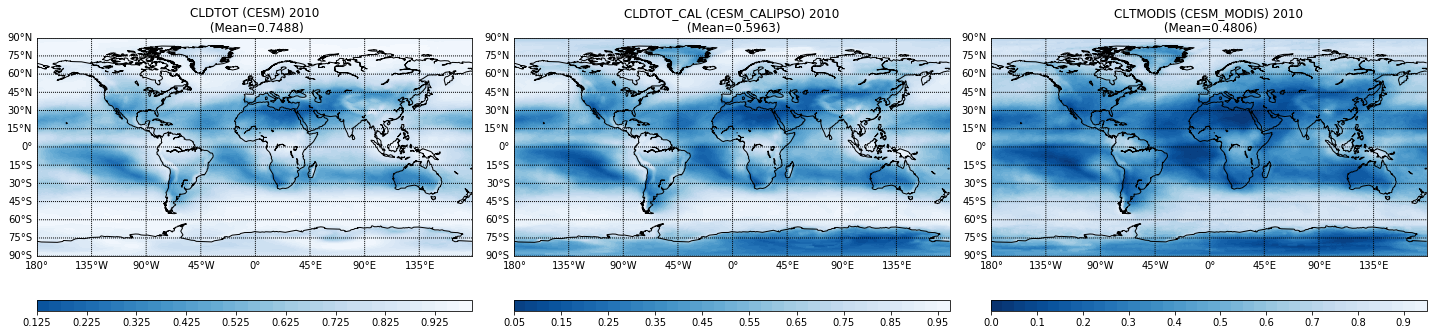

In [10]:
plt.figure(figsize=(20,20))
#CESM
plt.subplot(131)
plot_2D_global(CLDTOT_data.lons+180,CLDTOT_data.lats,np.roll(CLDTOT_mean,144,axis=1), data_name = 'CLDTOT (CESM) 2010\n (Mean=%.4g)' %np.mean(np.roll(CLDTOT_mean,144,axis=1)), levels=40, plot_type='normal', vmin=0, vmax=1, cmap='Blues_r')
#CESM_CALIPSO
plt.subplot(132)
plot_2D_global(CLDTOT_CAL_data.lons+180,CLDTOT_CAL_data.lats,np.roll(CLDTOT_CAL_mean/100,144,axis=1), data_name = 'CLDTOT_CAL (CESM_CALIPSO) 2010\n (Mean=%.4g)' %np.mean(np.roll(CLDTOT_CAL_mean/100,144,axis=1)), levels=40, plot_type='normal', vmin=0, vmax=1, cmap='Blues_r')
#CESM_MODIS
plt.subplot(133)
plot_2D_global(CLTMODIS_data.lons+180,CLTMODIS_data.lats,np.roll(CLTMODIS_mean/100.0,144,axis=1), data_name = 'CLTMODIS (CESM_MODIS) 2010\n (Mean=%.4g)' %np.mean(np.roll(CLTMODIS_mean/100,144,axis=1)), levels=40, plot_type='normal', vmin=0, vmax=1, cmap='Blues_r')
plt.tight_layout()
plt.savefig('/umbc/xfs1/cybertrn/cybertraining2020/team3/instruction/module06/cesm_run/CESM_2010.eps',format='eps')
plt.show()

/umbc/xfs1/zzbatmos/users/dwick1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


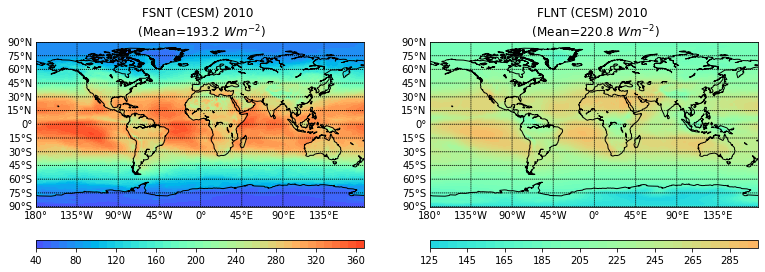

In [11]:
plt.figure(figsize=(20,20))
#CESM_FSNT
plt.subplot(131)
plot_2D_global(FSNT_data.lons+180,FSNT_data.lats,np.roll(FSNT_mean,144,axis=1), data_name = 'FSNT (CESM) 2010 \n (Mean=%.4g $Wm^{-2}$)' %np.mean(np.roll(FSNT_mean,144,axis=1)), levels=40, plot_type='normal', vmin=0, vmax=400, cmap='rainbow')
#CESM_FLNT
plt.subplot(132)
plot_2D_global(FLNT_data.lons+180,FLNT_data.lats,np.roll(FLNT_mean,144,axis=1), data_name = 'FLNT (CESM) 2010 \n (Mean=%.4g $Wm^{-2}$)' %np.mean(np.roll(FLNT_mean,144,axis=1)), levels=40, plot_type='normal', vmin=0, vmax=400, cmap='rainbow')
plt.savefig('/umbc/xfs1/cybertrn/cybertraining2020/team3/instruction/module06/cesm_run/CESM_radiation_2010.eps',format='eps')
plt.show()